# Imports

In [3]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import datetime

# Load Data

In [4]:
#Data Loading
df = pd.read_pickle('./pkl_files/df_tots.pkl')

In [5]:
df.head().T

Datetime,2014-01-01 07:41:00+00:00,2014-01-01 07:42:00+00:00,2014-01-01 07:42:00+00:00,2014-01-01 07:43:00+00:00,2014-01-01 07:43:00+00:00
Ambient Temperature [ºC],9.7,9.7,9.7,9.7,9.7
Global Radiation [W/m2],7.13115,7.04044,7.04044,6.59441,6.59441
Diffuse Radiation [W/m2],6.92915,6.84788,6.84788,6.67284,6.67284
Ultraviolet [W/m2],0.751824,0.78193,0.78193,0.813929,0.813929
Wind Velocity [m/s],0.7,0.666667,0.666667,0.616667,0.616667
Wind Direction [º],275.334,278.503,278.503,284.667,284.667
Current DC [A],0.19527,0.130512,0.0725,0.075,0.0525
PV Cell,A,B,A,A,B
Power DC [W],2.85095,2.38837,1.67475,1.7325,1.17338
Surface Temperature [ºC],9.4,9.7,9.4,9.4,9.7


# Extract Power

In [6]:
Power = df["Power DC [W]"]

In [7]:
Power.head()

Datetime
2014-01-01 07:41:00+00:00    2.850946
2014-01-01 07:42:00+00:00    2.388366
2014-01-01 07:42:00+00:00    1.674750
2014-01-01 07:43:00+00:00    1.732500
2014-01-01 07:43:00+00:00    1.173375
Name: Power DC [W], dtype: float64

In [8]:
df.shape

(1236488, 11)

In [9]:
#Drop power from df
df_m = df.drop(columns=["Power DC [W]"])

In [10]:
df_m.shape

(1236488, 10)

In [11]:
df_m.head().T

Datetime,2014-01-01 07:41:00+00:00,2014-01-01 07:42:00+00:00,2014-01-01 07:42:00+00:00,2014-01-01 07:43:00+00:00,2014-01-01 07:43:00+00:00
Ambient Temperature [ºC],9.7,9.7,9.7,9.7,9.7
Global Radiation [W/m2],7.13115,7.04044,7.04044,6.59441,6.59441
Diffuse Radiation [W/m2],6.92915,6.84788,6.84788,6.67284,6.67284
Ultraviolet [W/m2],0.751824,0.78193,0.78193,0.813929,0.813929
Wind Velocity [m/s],0.7,0.666667,0.666667,0.616667,0.616667
Wind Direction [º],275.334,278.503,278.503,284.667,284.667
Current DC [A],0.19527,0.130512,0.0725,0.075,0.0525
PV Cell,A,B,A,A,B
Surface Temperature [ºC],9.4,9.7,9.4,9.4,9.7
Voltage DC [V],14.6,18.3,23.1,23.1,22.35


# Train/Test Split

Looking at different splits. 

In [12]:
len(df_m) * .7, len(df_m) * .3, len(df_m) * .8, len(df_m) * .2

(865541.6, 370946.39999999997, 989190.4, 247297.6)

Will do an 80/20 split due to abundance of data. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Power DC [W]"), 
                                                    df["Power DC [W]"], test_size=0.2, 
                                                    random_state=47)

In [14]:
X_train.shape, X_test.shape

((989190, 10), (247298, 10))

In [15]:
y_train.shape, y_test.shape

((989190,), (247298,))

In [16]:
X_train.dtypes

Ambient Temperature [ºC]    float64
Global Radiation [W/m2]     float64
Diffuse Radiation [W/m2]    float64
Ultraviolet [W/m2]          float64
Wind Velocity [m/s]         float64
Wind Direction [º]          float64
Current DC [A]              float64
PV Cell                      object
Surface Temperature [ºC]    float64
Voltage DC [V]              float64
dtype: object

In [17]:
X_test.dtypes

Ambient Temperature [ºC]    float64
Global Radiation [W/m2]     float64
Diffuse Radiation [W/m2]    float64
Ultraviolet [W/m2]          float64
Wind Velocity [m/s]         float64
Wind Direction [º]          float64
Current DC [A]              float64
PV Cell                      object
Surface Temperature [ºC]    float64
Voltage DC [V]              float64
dtype: object

In [18]:
names_list = ['PV Cell']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((989190, 9), (247298, 9))

In [19]:
X_train.dtypes, X_test.dtypes

(Ambient Temperature [ºC]    float64
 Global Radiation [W/m2]     float64
 Diffuse Radiation [W/m2]    float64
 Ultraviolet [W/m2]          float64
 Wind Velocity [m/s]         float64
 Wind Direction [º]          float64
 Current DC [A]              float64
 Surface Temperature [ºC]    float64
 Voltage DC [V]              float64
 dtype: object,
 Ambient Temperature [ºC]    float64
 Global Radiation [W/m2]     float64
 Diffuse Radiation [W/m2]    float64
 Ultraviolet [W/m2]          float64
 Wind Velocity [m/s]         float64
 Wind Direction [º]          float64
 Current DC [A]              float64
 Surface Temperature [ºC]    float64
 Voltage DC [V]              float64
 dtype: object)

# Initial "Model" (the mean)

In [20]:
train_mean = y_train.mean()
train_mean

98.91863204041877

In [21]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[98.91863204]])

In [22]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([98.91863204, 98.91863204, 98.91863204, 98.91863204, 98.91863204])

In [23]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([98.91863204, 98.91863204, 98.91863204, 98.91863204, 98.91863204])

In [24]:
y_te_pred = train_mean * np.ones(len(y_test))

In [25]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -3.799678949256702e-08)

In [26]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(64.38191467394942, 64.39123315252351)

In [27]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(5192.215950402144, 5191.255824034419)

In [28]:
np.sqrt([mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)])

array([72.05703262, 72.05037005])

So using the mean, we are off by ~ 64.4 Watts when prediting power output, which would compound rather astoundingly for day/week prediction. 

# Initial (Actual) Models

We do not have missing data so skipping the fill/drop missing value step.

In [29]:
X_tr = X_train
X_te = X_test

## Scaling the data

In [30]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

## Linear regresion model

In [31]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [32]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [33]:
lm_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
lm_r2

(0.9978324913504911, 0.9978303874685225)

In [34]:
lm_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
lm_mae

(2.3985803596328124, 2.403066928581397)

In [35]:
lm_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
lm_mse

(11.254172982614593, 11.263013261972631)

Note! We have not yet removed the voltage/current columns. This great fit is expected as current and voltage exactly explain power (Voltage*Current = Power) and as noted in prior step, current is HIGHLY correlated to Power. 

In [36]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [37]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [38]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [39]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [40]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x1235cd160>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [41]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [42]:
lr_grid_cv.best_params_

{'selectkbest__k': 8}

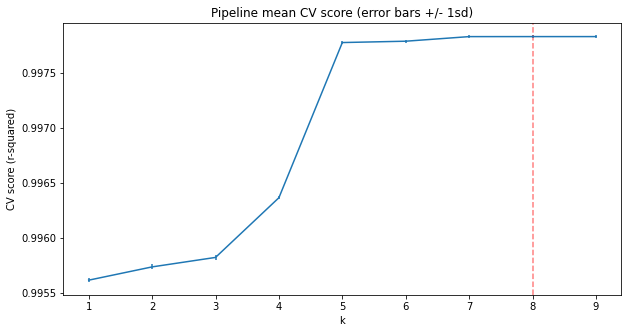

In [43]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [44]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [45]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Current DC [A]              72.750950
Global Radiation [W/m2]      3.337571
Voltage DC [V]               2.740923
Wind Velocity [m/s]          0.511517
Diffuse Radiation [W/m2]     0.248531
Ambient Temperature [ºC]     0.053963
Surface Temperature [ºC]    -2.287454
Ultraviolet [W/m2]          -4.078993
dtype: float64

Insert notes/observations here. 

# Random Forest Model

In [46]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47,n_jobs=-1)
)

In [47]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [48]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.99999714, 0.99999638, 0.999997  , 0.99999785, 0.99999645])

In [49]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9999969648065565, 5.344953533162398e-07)

In [50]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [51]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [ ]:
rf_grid_cv.fit(X_train, y_train)

In [ ]:
rf_grid_cv.best_params_

In [ ]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

In [ ]:
np.mean(rf_best_scores), np.std(rf_best_scores)

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');